# Projekt PSI - preprocessing
Szymon Mol

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Mineral ores round the world.csv', dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304632 entries, 0 to 304631
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   site_name   304621 non-null  object
 1   latitude    304613 non-null  object
 2   longitude   304613 non-null  object
 3   region      31179 non-null   object
 4   country     304617 non-null  object
 5   state       292148 non-null  object
 6   county      252873 non-null  object
 7   com_type    300815 non-null  object
 8   commod1     283601 non-null  object
 9   commod2     21632 non-null   object
 10  commod3     63139 non-null   object
 11  oper_type   304632 non-null  object
 12  dep_type    37483 non-null   object
 13  prod_size   108352 non-null  object
 14  dev_stat    304632 non-null  object
 15  ore         70558 non-null   object
 16  gangue      33008 non-null   object
 17  work_type   25600 non-null   object
 18  names       65340 non-null   object
 19  ore_ctrl    23922 non-n

chcemy targetować prod_size

In [4]:
df.isna().sum()

site_name         11
latitude          19
longitude         19
region        273453
country           15
state          12484
county         51759
com_type        3817
commod1        21031
commod2       283000
commod3       241493
oper_type          0
dep_type      267149
prod_size     196280
dev_stat           0
ore           234074
gangue        271624
work_type     279032
names         239292
ore_ctrl      280710
hrock_type    235103
arock_type    278974
dtype: int64

usuwam pusty target i niepotrzebne kolumny z nazwami

In [5]:
df.drop(df[df['prod_size'].isna()==True].index, inplace=True)
df.drop(['site_name', 'county', 'state', 'country', 'names'], axis=1, inplace=True)

In [6]:
df

,latitude,longitude,region,com_type,commod1,commod2,commod3,oper_type,dep_type,prod_size,dev_stat,ore,gangue,work_type,ore_ctrl,hrock_type,arock_type
0,55.05612,-132.14344,NaN,M,Copper,"Gold, Silver",NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Covellite, Pyrite","Quartz, Sericite",NaN,NaN,Schist,NaN
1,55.52751,-132.68514,NaN,M,Copper,Gold,NaN,Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite","Calcite, Quartz, Siderite",Underground,Vein Follows Contact,Diabase,NaN
2,55.97751,-132.99906,NaN,M,Copper,NaN,"Zinc, Gold",Unknown,NaN,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Quartz,NaN,NaN,Siltstone,NaN
3,55.52195,-132.68653,NaN,M,Gold,NaN,"Copper, Lead",Unknown,NaN,N,Occurrence,"Galena, Malachite, Pyrite",NaN,NaN,NaN,Granite,Granite
4,55.14556,-132.05233,NaN,M,Gold,NaN,NaN,Unknown,NaN,N,Occurrence,Pyrite,NaN,NaN,NaN,Mica Schist,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304627,6.00128,-58.166,SA,M,Aluminum,NaN,NaN,Unknown,LATERITIC BAUXITE,L,Producer,NaN,NaN,NaN,PRE-PLIOCENE PENEPLAIN,NaN,NaN
304628,20.38117,-105.10877,NaN,NaN,"Copper, Gold, Silver, Lead, Zinc",NaN,NaN,Unknown,NaN,Y,Producer,NaN,NaN,NaN,NaN,NaN,NaN
304629,14.44527,-87.2928,NaN,M,Iron,NaN,NaN,Unknown,"SKARN, REPLACEMENT",M,Prospect,NaN,NaN,NaN,NaN,NaN,NaN
304630,12.21347,-85.16665,NaN,NaN,Gold,Silver,"Lead, Arsenic, Antimony, Cadmium, Cobalt, Mang...",Unknown,"EPITHERMAL VEINS, SHEAR ZONES, VEIN",M,Producer,NaN,NaN,NaN,INTERSECTIONS OF NE AND NW STRUCTURAL ELEMENTS...,NaN,NaN


usuwam te kolumny gdzie za dużo missing data

In [7]:
df.isna().sum()/len(df)

latitude      0.000028
longitude     0.000028
region        0.794060
com_type      0.004947
commod1       0.062925
commod2       0.866232
commod3       0.830119
oper_type     0.000000
dep_type      0.663652
prod_size     0.000000
dev_stat      0.000000
ore           0.397944
gangue        0.717476
work_type     0.808504
ore_ctrl      0.780585
hrock_type    0.377464
arock_type    0.769067
dtype: float64

In [8]:
df.drop(['region', 'commod2', 'commod3', 'dep_type', 'ore_ctrl', 'gangue', 'arock_type', 'work_type'], axis=1, inplace=True)

In [9]:
df.isna().sum()

latitude          3
longitude         3
com_type        536
commod1        6818
oper_type         0
prod_size         0
dev_stat          0
ore           43118
hrock_type    40899
dtype: int64

czyszczę najważniejsze zmienne z missing data

In [10]:
df.drop(df[(df['latitude'].isna() | df['commod1'].isna() | df['ore'].isna() | df['hrock_type'].isna())==True].index, inplace=True)

In [11]:
df.isna().sum()

latitude       0
longitude      0
com_type      55
commod1        0
oper_type      0
prod_size      0
dev_stat       0
ore            0
hrock_type     0
dtype: int64

jak widać będą missing data w com_type, ale zajmiemy się nimi później (są łatwo usuwalne za pomocą imputerów)

In [12]:
df

,latitude,longitude,com_type,commod1,oper_type,prod_size,dev_stat,ore,hrock_type
0,55.05612,-132.14344,M,Copper,Unknown,N,Occurrence,"Chalcopyrite, Covellite, Pyrite",Schist
1,55.52751,-132.68514,M,Copper,Unknown,N,Occurrence,"Chalcopyrite, Pyrite",Diabase
2,55.97751,-132.99906,M,Copper,Unknown,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Siltstone
3,55.52195,-132.68653,M,Gold,Unknown,N,Occurrence,"Galena, Malachite, Pyrite",Granite
4,55.14556,-132.05233,M,Gold,Unknown,N,Occurrence,Pyrite,Mica Schist
...,...,...,...,...,...,...,...,...,...
302030,35.9375,-117.185,M,"Gold, Silver",Surface-Underground,L,Producer,Pyrite,"Gneiss,Volcanic Rock (Aphanitic)"
302031,35.28472,-115.10028,B,"Gold, Silver",Surface-Underground,L,Producer,"Gold, Electrum, Pyrite","Rhyolite,Volcanic Breccia (Agglomerate)"
302033,35.57,-115.56556,M,"Gold, Silver",Surface-Underground,L,Past Producer,"Gold, Electrum, Chalcopyrite, Galena, Silver",Felsic Volcanic Rock
302037,32.97694,-114.78833,M,"Gold, Silver",Surface,N,Prospect,"Gold, Silver, Electrum",Gneiss


In [13]:
df.describe(include='all').loc['unique', :]

latitude      41844
longitude     41964
com_type          4
commod1        2250
oper_type         8
prod_size         6
dev_stat          6
ore            7915
hrock_type     2471
Name: unique, dtype: object

## Preprocessing

### latitude i longitude
chcę zamienić długość i szerokość geograficzną na punkty w 3d w układzie kartezjańskim, bo te współrzędne, które są teraz, nie zachowują odległości

In [14]:
import matplotlib.pyplot as plt
import numpy as np

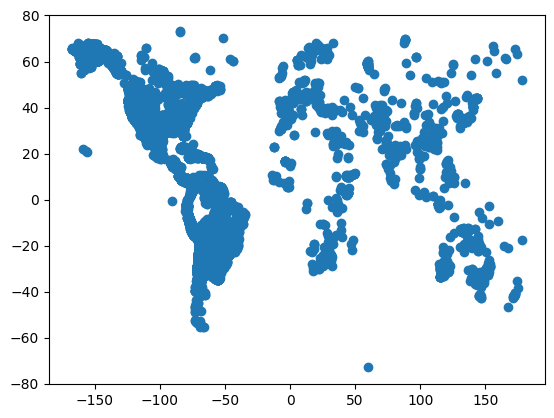

In [15]:
theta = pd.to_numeric(df['longitude'])
phi = pd.to_numeric(df['latitude'])
plt.scatter(theta, phi)

In [16]:
def to_sphere(theta, phi):
    theta = theta*np.pi/180.0
    phi = phi*np.pi/180.0
    return np.array([-np.cos(phi)*np.sin(theta), np.cos(phi)*np.cos(theta), np.sin(phi)])

In [17]:
new_coords = to_sphere(theta, phi)

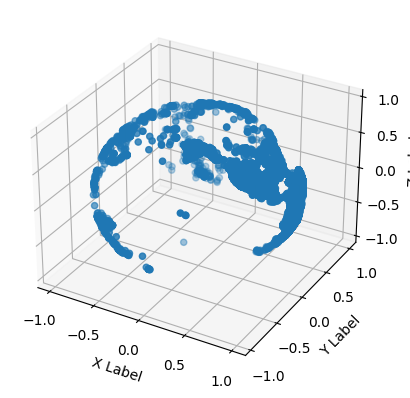

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(new_coords[0], new_coords[1], new_coords[2])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [19]:
df[['x','y','z']] = new_coords.transpose()

In [20]:
df.drop(['latitude', 'longitude'], axis=1, inplace=True)

### commod1
chcę zrobić coś jakby kodowanie one hot, ale trzeba rozdzielić stringi na mniejsze i dorobić kategorię inne

In [21]:
df.commod1.unique()

array(['Copper', 'Gold', 'Lead', ...,
       'Silver, Lead, Zinc, Gold, Antimony',
       'Zinc, Silver, Gold, Lead, Copper',
       'Molybdenum, Tungsten, Silver, Gold, Copper'], dtype=object)

In [22]:
com1 = [x.strip() for s in df['commod1'] for x in s.split(',')]

wybieram 1500 na odcięcie mniejszych wartości

In [23]:
mask = np.unique(com1, return_counts=True)[1] > 1500
names = list(np.unique(com1, return_counts=True)[0][mask])

In [24]:
np.unique(com1, return_counts=True)[1][mask].sum()/np.unique(com1, return_counts=True)[1].sum()

0.7137383837834901

In [25]:
names.append('Other_com1')

In [26]:
arr = np.zeros((len(df), len(names)))

In [27]:
for i, s in enumerate(df['commod1']):
    for x in s.split(','):
        x = x.strip()
        if x in names:
            arr[i, names.index(x)] = 1.0
        else:
            arr[i, 10] = 1.0

#### Test że działa

In [28]:
df.iloc[-2]

com_type                           M
commod1                 Gold, Silver
oper_type                    Surface
prod_size                          N
dev_stat                    Prospect
ore           Gold, Silver, Electrum
hrock_type                    Gneiss
x                           0.761597
y                          -0.351719
z                           0.544301
Name: 302037, dtype: object

In [29]:
names

['Construction',
 'Copper',
 'Gold',
 'Iron',
 'Lead',
 'Sand and Gravel',
 'Silver',
 'Tungsten',
 'Uranium',
 'Zinc',
 'Other_com1']

In [30]:
arr[-2]

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [31]:
df[names] = arr

In [32]:
df.drop('commod1', axis=1, inplace=True)

In [33]:
df

,com_type,oper_type,prod_size,dev_stat,ore,hrock_type,x,y,z,Construction,Copper,Gold,Iron,Lead,Sand and Gravel,Silver,Tungsten,Uranium,Zinc,Other_com1
0,M,Unknown,N,Occurrence,"Chalcopyrite, Covellite, Pyrite",Schist,0.424693,-0.384325,0.819713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,Unknown,N,Occurrence,"Chalcopyrite, Pyrite",Diabase,0.416069,-0.383738,0.824398,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,Unknown,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Siltstone,0.409212,-0.381584,0.828818,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,Unknown,N,Occurrence,"Galena, Malachite, Pyrite",Granite,0.416118,-0.383802,0.824343,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,Unknown,N,Occurrence,Pyrite,Mica Schist,0.424353,-0.382792,0.820607,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302030,M,Surface-Underground,L,Producer,Pyrite,"Gneiss,Volcanic Rock (Aphanitic)",0.720220,-0.369904,0.586902,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
302031,B,Surface-Underground,L,Producer,"Gold, Electrum, Pyrite","Rhyolite,Volcanic Breccia (Agglomerate)",0.739207,-0.346274,0.577640,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
302033,M,Surface-Underground,L,Past Producer,"Gold, Electrum, Chalcopyrite, Galena, Silver",Felsic Volcanic Rock,0.733767,-0.351020,0.581697,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
302037,M,Surface,N,Prospect,"Gold, Silver, Electrum",Gneiss,0.761597,-0.351719,0.544301,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### oper_type

In [34]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [35]:
one_hot_encoder.fit(df['oper_type'].values.reshape(-1,1))

OneHotEncoder(sparse_output=False)

In [36]:
df[list(one_hot_encoder.get_feature_names_out())] = one_hot_encoder.transform(df['oper_type'].values.reshape(-1,1))

In [37]:
df.drop('oper_type', axis=1, inplace=True)

In [38]:
df

,com_type,prod_size,dev_stat,ore,hrock_type,x,y,z,Construction,Copper,...,Zinc,Other_com1,x0_Leach,x0_Placer,x0_Processing Plant,x0_Surface,x0_Surface-Underground,x0_Underground,x0_Unknown,x0_Well
0,M,N,Occurrence,"Chalcopyrite, Covellite, Pyrite",Schist,0.424693,-0.384325,0.819713,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,M,N,Occurrence,"Chalcopyrite, Pyrite",Diabase,0.416069,-0.383738,0.824398,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,M,N,Occurrence,"Chalcopyrite, Pyrite, Sphalerite",Siltstone,0.409212,-0.381584,0.828818,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,M,N,Occurrence,"Galena, Malachite, Pyrite",Granite,0.416118,-0.383802,0.824343,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,M,N,Occurrence,Pyrite,Mica Schist,0.424353,-0.382792,0.820607,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302030,M,L,Producer,Pyrite,"Gneiss,Volcanic Rock (Aphanitic)",0.720220,-0.369904,0.586902,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
302031,B,L,Producer,"Gold, Electrum, Pyrite","Rhyolite,Volcanic Breccia (Agglomerate)",0.739207,-0.346274,0.577640,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
302033,M,L,Past Producer,"Gold, Electrum, Chalcopyrite, Galena, Silver",Felsic Volcanic Rock,0.733767,-0.351020,0.581697,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
302037,M,N,Prospect,"Gold, Silver, Electrum",Gneiss,0.761597,-0.351719,0.544301,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### dev_stat

In [39]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder.fit(df['dev_stat'].values.reshape(-1,1))

OneHotEncoder(sparse_output=False)

In [40]:
df[list(one_hot_encoder.get_feature_names_out())] = one_hot_encoder.transform(df['dev_stat'].values.reshape(-1,1))

In [41]:
df.drop('dev_stat', axis=1, inplace=True)

In [42]:
df

,com_type,prod_size,ore,hrock_type,x,y,z,Construction,Copper,Gold,...,x0_Surface,x0_Surface-Underground,x0_Underground,x0_Unknown,x0_Well,x0_Occurrence,x0_Past Producer,x0_Plant,x0_Producer,x0_Prospect
0,M,N,"Chalcopyrite, Covellite, Pyrite",Schist,0.424693,-0.384325,0.819713,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,M,N,"Chalcopyrite, Pyrite",Diabase,0.416069,-0.383738,0.824398,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,M,N,"Chalcopyrite, Pyrite, Sphalerite",Siltstone,0.409212,-0.381584,0.828818,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,M,N,"Galena, Malachite, Pyrite",Granite,0.416118,-0.383802,0.824343,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,M,N,Pyrite,Mica Schist,0.424353,-0.382792,0.820607,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302030,M,L,Pyrite,"Gneiss,Volcanic Rock (Aphanitic)",0.720220,-0.369904,0.586902,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
302031,B,L,"Gold, Electrum, Pyrite","Rhyolite,Volcanic Breccia (Agglomerate)",0.739207,-0.346274,0.577640,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
302033,M,L,"Gold, Electrum, Chalcopyrite, Galena, Silver",Felsic Volcanic Rock,0.733767,-0.351020,0.581697,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
302037,M,N,"Gold, Silver, Electrum",Gneiss,0.761597,-0.351719,0.544301,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### ore

In [43]:
ore = [x.strip() for s in df['ore'] for x in s.split(',')]
mask = np.unique(ore, return_counts=True)[1] > 2000
names = list(np.unique(ore, return_counts=True)[0][mask])
names.append('Other_ore')

In [44]:
np.unique(ore, return_counts=True)[1][mask].sum()/np.unique(ore, return_counts=True)[1].sum()

0.48880546207862435

In [45]:
arr = np.zeros((len(df), len(names)))
for i, s in enumerate(df['ore']):
    for x in s.split(','):
        x = x.strip()
        if x in names:
            arr[i, names.index(x)] = 1.0
        else:
            arr[i, -1] = 1.0

In [46]:
df[names] = arr

In [47]:
df.drop('ore', axis=1, inplace=True)
df

,com_type,prod_size,hrock_type,x,y,z,Construction,Copper,Gold,Iron,...,x0_Prospect,Chalcocite,Chalcopyrite,Galena,Hematite,Magnetite,Malachite,Pyrite,Sphalerite,Other_ore
0,M,N,Schist,0.424693,-0.384325,0.819713,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,M,N,Diabase,0.416069,-0.383738,0.824398,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,M,N,Siltstone,0.409212,-0.381584,0.828818,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,M,N,Granite,0.416118,-0.383802,0.824343,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,M,N,Mica Schist,0.424353,-0.382792,0.820607,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302030,M,L,"Gneiss,Volcanic Rock (Aphanitic)",0.720220,-0.369904,0.586902,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
302031,B,L,"Rhyolite,Volcanic Breccia (Agglomerate)",0.739207,-0.346274,0.577640,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
302033,M,L,Felsic Volcanic Rock,0.733767,-0.351020,0.581697,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
302037,M,N,Gneiss,0.761597,-0.351719,0.544301,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### hrock_type

In [48]:
rock = [x.strip() for s in df['hrock_type'] for x in s.split(',')]
mask = np.unique(rock, return_counts=True)[1] > 2000
names = list(np.unique(rock, return_counts=True)[0][mask])
names.append('Other_hrock')

In [49]:
np.unique(rock, return_counts=True)[1][mask].sum()/np.unique(rock, return_counts=True)[1].sum()

0.5643729903536977

In [50]:
arr = np.zeros((len(df), len(names)))
for i, s in enumerate(df['hrock_type']):
    for x in s.split(','):
        x = x.strip()
        if x in names:
            arr[i, names.index(x)] = 1.0
        else:
            arr[i, -1] = 1.0

In [51]:
df[names] = arr

In [52]:
df.drop('hrock_type', axis=1, inplace=True)
df

,com_type,prod_size,x,y,z,Construction,Copper,Gold,Iron,Lead,...,Dolomite,Gneiss,Granite,Gravel,Limestone,Quartzite,Sandstone,Schist,Shale,Other_hrock
0,M,N,0.424693,-0.384325,0.819713,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,M,N,0.416069,-0.383738,0.824398,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,M,N,0.409212,-0.381584,0.828818,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,M,N,0.416118,-0.383802,0.824343,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,N,0.424353,-0.382792,0.820607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302030,M,L,0.720220,-0.369904,0.586902,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
302031,B,L,0.739207,-0.346274,0.577640,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
302033,M,L,0.733767,-0.351020,0.581697,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
302037,M,N,0.761597,-0.351719,0.544301,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Export preprocesowanych danych

In [53]:
df.to_csv('data/dane_poprawione.csv', index=False)